## Task 3: M1

In [1]:
import numpy as np

# Dummy data
sq_footage = np.array([1500, 1800, 2200, 1200, 1600])
num_bedrooms = np.array([3, 4, 5, 2, 3])
distance_from_city = np.array([2, 1, 0, 3, 2])
price = np.array([200000, 220000, 250000, 180000, 210000])

# Create the design matrix
X = np.column_stack((np.ones_like(sq_footage), sq_footage, num_bedrooms, distance_from_city))
y = price

# Hyperparameter
max_iterations = 3000
epsilon = 1e-6  # Convergence criterion

# Initialize coefficients
np.random.seed(42)  # For reproducibility
beta = np.random.rand(4)

# Perform steepest descent iterations
for iteration in range(max_iterations):
    # Compute residual
    r = y - X @ beta
    
    # Determine the steepest descent direction
    d = X.T @ r
    
    # Compute step size
    alpha = np.dot(r.T, X @ d) / np.dot(X @ d, X @ d)
    
    # Take the step
    beta = beta + alpha * d
    
    # Check the convergence criterion
    if np.linalg.norm(d) < epsilon:
        break

# Print the final coefficients
print("Intercept (beta0):", beta[0])
print("Coefficient for sq_footage (beta1):", beta[1])
print("Coefficient for num_bedrooms (beta2):", beta[2])
print("Coefficient for distance_from_city (beta3):", beta[3])


Intercept (beta0): 2913.0568348244433
Coefficient for sq_footage (beta1): 111.43911265967715
Coefficient for num_bedrooms (beta2): 429.8411027810578
Coefficient for distance_from_city (beta3): 14134.901023172968


In [15]:
new_sq_footage = np.array([1500])
new_num_bedrooms = np.array([3])
new_distance_from_city = np.array([2])

# Create the design matrix for new data
X_new = np.column_stack((np.ones_like(new_sq_footage), new_sq_footage, new_num_bedrooms, new_distance_from_city))

# Use the final coefficients to make predictions on new data
predictions_new = X_new @ beta

# Print the predictions for new data"
print("Predictions for new data:", predictions_new)

Predictions for new data: [199631.05117903]


## Task 3: M2

In [16]:
import numpy as np

# Dummy data
sq_footage = np.array([1500, 1800, 2200, 1200, 1600])
num_bedrooms = np.array([3, 4, 5, 2, 3])
distance_from_city = np.array([2, 1, 0, 3, 2])
price = np.array([200000, 220000, 250000, 180000, 210000])

# Create the design matrix
X = np.column_stack((np.ones_like(sq_footage), sq_footage, num_bedrooms, distance_from_city))

# Calculate the coefficients using the normal equations
beta = np.linalg.inv(X.T @ X) @ X.T @ price

# Print the final coefficients
print("Intercept (beta0):", beta[0])
print("Coefficient for sq_footage (beta1):", beta[1])
print("Coefficient for num_bedrooms (beta2):", beta[2])
print("Coefficient for distance_from_city (beta3):", beta[3])


Intercept (beta0): 381875.0
Coefficient for sq_footage (beta1): -14.637799549610257
Coefficient for num_bedrooms (beta2): -9843.75
Coefficient for distance_from_city (beta3): 46093.75


In [17]:
new_sq_footage = np.array([1500])
new_num_bedrooms = np.array([3])
new_distance_from_city = np.array([2])

# Create the design matrix for new data
X_new = np.column_stack((np.ones_like(new_sq_footage), new_sq_footage, new_num_bedrooms, new_distance_from_city))

# Use the final coefficients to make predictions on new data
predictions_new = X_new @ beta

# Print the predictions for new data"
print("Predictions for new data:", predictions_new)

Predictions for new data: [422574.55067558]


### Task 3 2nd' Part

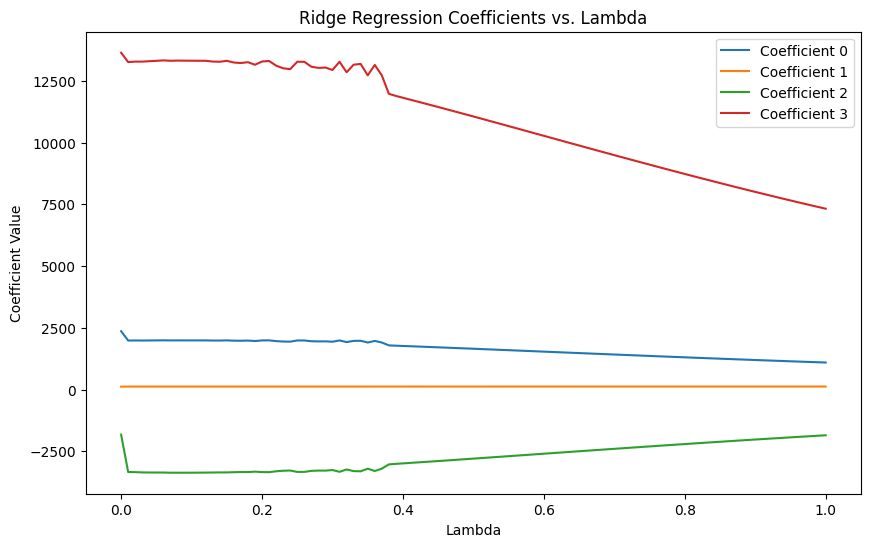

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data
sq_footage = np.array([1500, 1800, 2200, 1200, 1600])
num_bedrooms = np.array([3, 4, 5, 2, 3])
distance_from_city = np.array([2, 1, 0, 3, 2])
price = np.array([200000, 220000, 250000, 180000, 210000])

# Create the design matrix
X = np.column_stack((np.ones_like(sq_footage), sq_footage, num_bedrooms, distance_from_city))
y = price

# Hyperparameters
max_iterations = 1000
epsilon = 1e-6  # Convergence criterion
learning_rate = 0.01  # Initial learning rate

# Regularization parameter values
lambda_values = np.arange(0, 1.01, 0.01)

# Initialize coefficients
beta_history = np.zeros((len(lambda_values), X.shape[1]))  # Store coefficients for each lambda

# Ridge regression iterations for different lambda values
for idx, lambda_val in enumerate(lambda_values):
    np.random.seed(42)  # For reproducibility
    beta = np.random.rand(X.shape[1]) # Initialize coefficients
    
    for iteration in range(max_iterations):
        # Compute residual
        r = y - X @ beta
        
        # Determine the steepest descent direction with regularization term
        d = X.T @ r + lambda_val * beta
        
        # Compute step size
        alpha = np.dot(r.T, X @ d) / np.dot(X @ d, X @ d)
        
        # Take the step
        beta = beta + alpha * d
        
        # Check the convergence criterion
        if np.linalg.norm(d) < epsilon:
            break
    
    # Save coefficients for the current lambda
    beta_history[idx, :] = beta

# Plot the coefficients as a function of lambda
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(lambda_values, beta_history[:, i], label=f'Coefficient {i}')

plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients vs. Lambda')
plt.legend()
plt.savefig("fig.png", dpi = 150, bbox_inches = 'tight')


In [19]:
new_sq_footage = np.array([1500])
new_num_bedrooms = np.array([3])
new_distance_from_city = np.array([2])
# Create the design matrix for new data
X_new = np.column_stack((np.ones_like(new_sq_footage), new_sq_footage, new_num_bedrooms, new_distance_from_city))

# Use the final coefficients to make predictions on new data
predictions_ridge = X_new @ beta

# Print the predictions for new data
print("Predictions for new data using Ridge Regression:", predictions_ridge)

Predictions for new data using Ridge Regression: [194347.35468185]
